## ===== 1. Import Library & Load Dataset =====

In [ ]:
# Install library yfinance terlebih dahulu jika belum ada di lingkungan Colab Anda
!pip install yfinance

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Time Series Libraries
from sklearn.metrics import mean_absolute_percentage_error
print("All libraries imported successfully!")

All libraries imported successfully!


## ===== 2. LOAD DAN EXPLORE DATA =====

In [2]:
print("=== LOADING DATA FROM YAHOO FINANCE ===")

try:
    ticker = "BTC-USD"
    start_date = "2014-09-17" # Tanggal mulai data sesuai notebook Anda

    # Mengunduh data menggunakan yfinance
    df = yf.download(ticker, start=start_date)

    if not df.empty:
        print("Data loaded successfully!")

        # Membersihkan data (jika ada kolom yang tidak perlu)
        if 'Dividends' in df.columns and 'Stock Splits' in df.columns:
            df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

        # Menampilkan 5 baris terakhir untuk verifikasi
        print("\nData 5 hari terakhir:")
        display(df.tail())
    else:
        print("Tidak ada data yang berhasil diambil dari Yahoo Finance.")

except Exception as e:
    print(f"Terjadi kesalahan saat mengambil data: {e}")

[*********************100%***********************]  1 of 1 completed

=== LOADING DATA FROM YAHOO FINANCE ===
YF.download() has changed argument auto_adjust default to True
Data loaded successfully!

Data 5 hari terakhir:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-06-08,105793.648438,106497.062500,105075.328125,105617.507812,36626232328
2025-06-09,110294.101562,110561.421875,105400.234375,105793.023438,55903193732
2025-06-10,110257.234375,110380.125000,108367.710938,110295.687500,54700101509
2025-06-11,108686.625000,110384.218750,108086.328125,110261.796875,50842662052
2025-06-12,107062.937500,108769.085938,107062.937500,108687.656250,54218301440


In [3]:
# Initial data exploration
print("\n=== INITIAL DATA EXPLORATION ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


=== INITIAL DATA EXPLORATION ===
Dataset shape: (3922, 5)

First 5 rows:
Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [4]:
print("\n=== Dataset info ===")
print(df.info())


=== Dataset info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3922 entries, 2014-09-17 to 2025-06-12
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3922 non-null   float64
 1   (High, BTC-USD)    3922 non-null   float64
 2   (Low, BTC-USD)     3922 non-null   float64
 3   (Open, BTC-USD)    3922 non-null   float64
 4   (Volume, BTC-USD)  3922 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 183.8 KB
None


In [5]:
print("\nBasic statistics:")
print("\n=== nBasic statistics ===")
print(df.describe())


Basic statistics:

=== nBasic statistics ===
Price           Close           High            Low           Open  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count     3922.000000    3922.000000    3922.000000    3922.000000   
mean     22720.627361   23187.132134   22179.753164   22694.605517   
std      26442.111217   26941.634626   25860.158520   26411.476825   
min        178.102997     211.731003     171.509995     176.897003   
25%       2102.497498    2238.404907    1997.275024    2057.317566   
50%       9867.606934   10127.567871    9623.344727    9859.893066   
75%      36946.254883   37862.520508   35619.986328   36870.586914   
max     111673.281250  111970.171875  109285.070312  111679.359375   

Price         Volume  
Ticker       BTC-USD  
count   3.922000e+03  
mean    1.962195e+10  
std     2.096857e+10  
min     5.914570e+06  
25%     8.854575e+08  
50%     1.577476e+10  
75%     3.096498e+10  
max     3.509679e+11  


## ===== 3. DATA PREPROCESSING AND CLEANING =====

In [6]:
print("\n=== DATA PREPROCESSING ===")

# Check for missing values (langkah ini tetap baik untuk dilakukan)
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values jika ada (praktik yang baik)
df.interpolate(method='linear', inplace=True)
df.dropna(inplace=True)

# Catatan: Langkah mengubah 'Date' menjadi datetime dan menjadikannya index
# sudah tidak diperlukan karena yfinance melakukannya secara otomatis.

# Hapus kolom yang tidak diperlukan jika ada
columns_to_drop = ['Dividends', 'Stock Splits']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Tampilkan informasi akhir setelah pembersihan
print(f"\nFinal dataset shape after cleaning: {df.shape}")
print(f"Missing values after cleaning: {df.isnull().sum().sum()}")
print("Data preprocessing complete.")


=== DATA PREPROCESSING ===
Missing values per column:
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

Final dataset shape after cleaning: (3922, 5)
Missing values after cleaning: 0
Data preprocessing complete.


## ===== 4. EXPLORATORY DATA ANALYSIS (EDA) =====

In [7]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

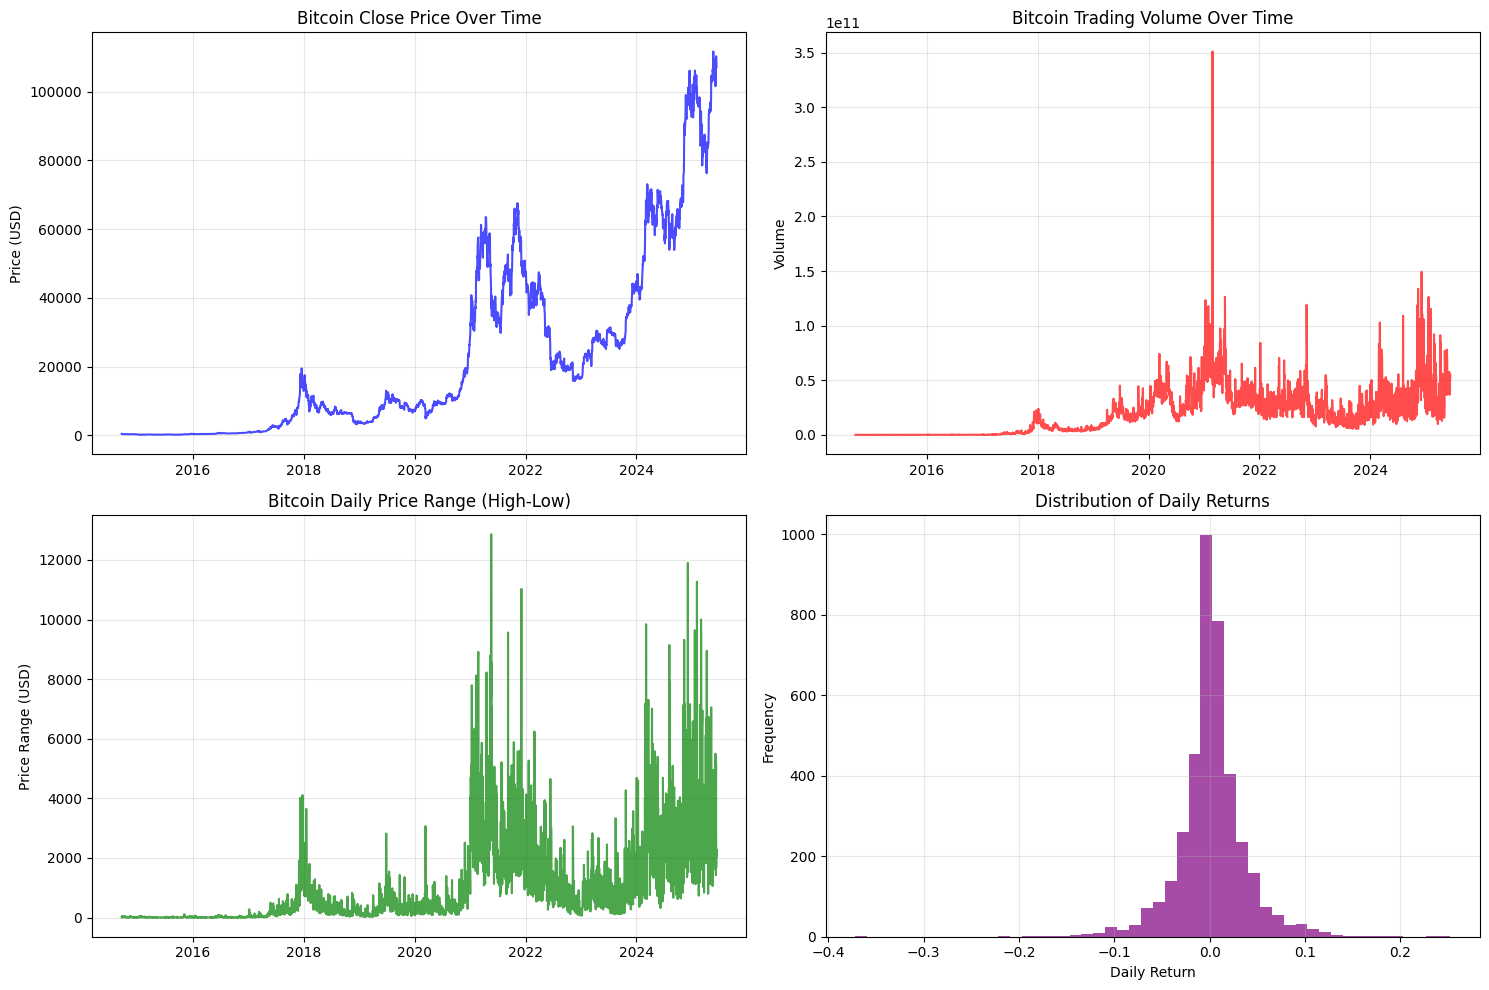

In [8]:
# 1. Price Evolution Over Time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Close price over time
axes[0,0].plot(df.index, df['Close'], color='blue', alpha=0.7)
axes[0,0].set_title('Bitcoin Close Price Over Time')
axes[0,0].set_ylabel('Price (USD)')
axes[0,0].grid(True, alpha=0.3)

# Volume over time
axes[0,1].plot(df.index, df['Volume'], color='red', alpha=0.7)
axes[0,1].set_title('Bitcoin Trading Volume Over Time')
axes[0,1].set_ylabel('Volume')
axes[0,1].grid(True, alpha=0.3)

# Price range (High-Low) over time
price_range = df['High'] - df['Low']
axes[1,0].plot(df.index, price_range, color='green', alpha=0.7)
axes[1,0].set_title('Bitcoin Daily Price Range (High-Low)')
axes[1,0].set_ylabel('Price Range (USD)')
axes[1,0].grid(True, alpha=0.3)

# Daily returns
daily_returns = df['Close'].pct_change().dropna()
axes[1,1].hist(daily_returns, bins=50, alpha=0.7, color='purple')
axes[1,1].set_title('Distribution of Daily Returns')
axes[1,1].set_xlabel('Daily Return')
axes[1,1].set_ylabel('Frequency')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

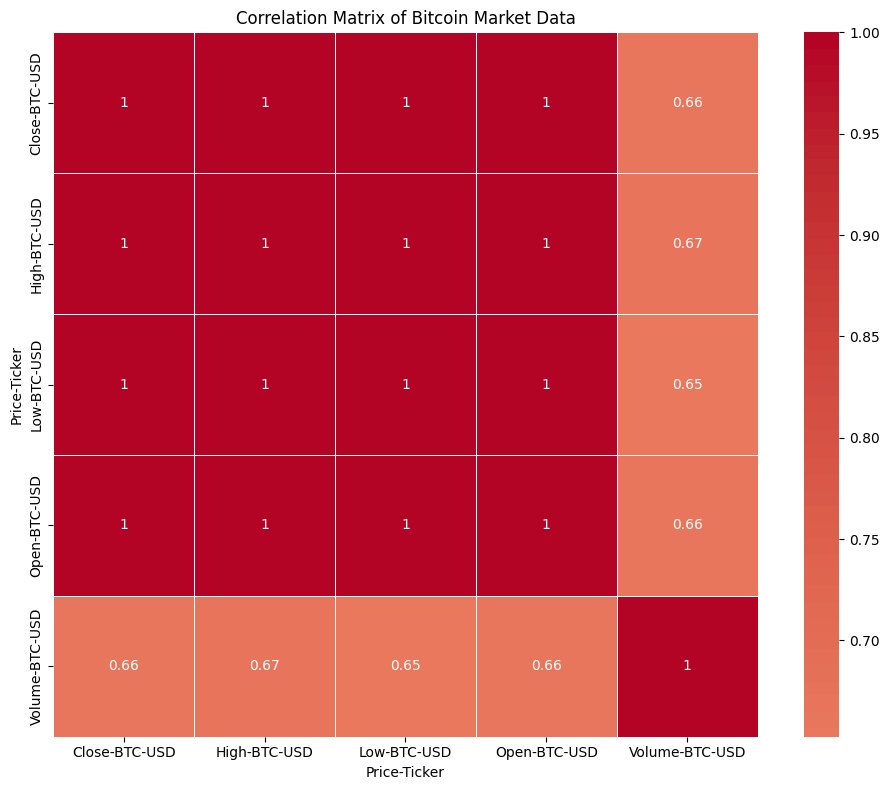

In [9]:
# 2. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Bitcoin Market Data')
plt.tight_layout()
plt.show()

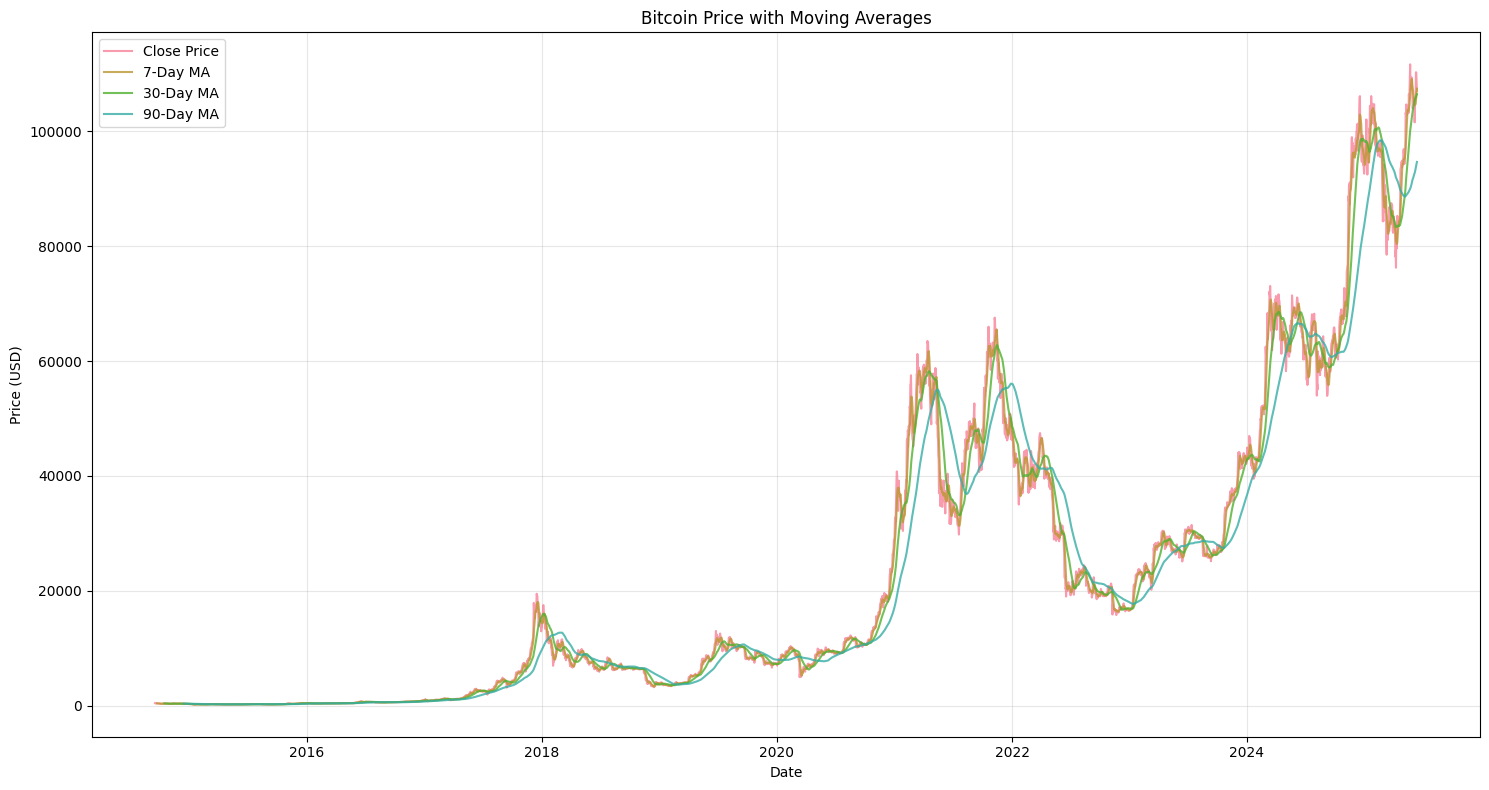

In [10]:
# 3. Moving Averages Analysis
plt.figure(figsize=(15, 8))
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()

plt.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
plt.plot(df.index, df['MA_7'], label='7-Day MA', alpha=0.8)
plt.plot(df.index, df['MA_30'], label='30-Day MA', alpha=0.8)
plt.plot(df.index, df['MA_90'], label='90-Day MA', alpha=0.8)
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## ===== 5. FEATURE ENGINEERING =====

In [11]:
print("\n=== FEATURE ENGINEERING ===")

def create_features(df):
    """Create technical indicators and features for ML models"""
    df_features = df.copy()

    # Price-based features
    df_features['Price_Change'] = df_features['Close'] - df_features['Open']
    df_features['Price_Range'] = df_features['High'] - df_features['Low']
    df_features['Price_Position'] = (df_features['Close'] - df_features['Low']) / (df_features['High'] - df_features['Low'])

    # Returns
    df_features['Daily_Return'] = df_features['Close'].pct_change()
    df_features['Log_Return'] = np.log(df_features['Close'] / df_features['Close'].shift(1))

    # Moving averages (already created above)
    df_features['MA_7_ratio'] = df_features['Close'] / df_features['MA_7']
    df_features['MA_30_ratio'] = df_features['Close'] / df_features['MA_30']

    # Volatility (rolling standard deviation)
    df_features['Volatility_7'] = df_features['Daily_Return'].rolling(window=7).std()
    df_features['Volatility_30'] = df_features['Daily_Return'].rolling(window=30).std()

    # RSI (Relative Strength Index)
    def calculate_rsi(prices, window=14):
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    df_features['RSI'] = calculate_rsi(df_features['Close'])

    # Bollinger Bands
    df_features['BB_middle'] = df_features['Close'].rolling(window=20).mean()
    bb_std = df_features['Close'].rolling(window=20).std()
    df_features['BB_upper'] = df_features['BB_middle'] + (bb_std * 2)
    df_features['BB_lower'] = df_features['BB_middle'] - (bb_std * 2)
    df_features['BB_position'] = (df_features['Close'] - df_features['BB_lower']) / (df_features['BB_upper'] - df_features['BB_lower'])

    # Volume features
    df_features['Volume_MA'] = df_features['Volume'].rolling(window=7).mean()
    df_features['Volume_ratio'] = df_features['Volume'] / df_features['Volume_MA']

    # Time-based features
    df_features['Day_of_week'] = df_features.index.dayofweek
    df_features['Month'] = df_features.index.month
    df_features['Quarter'] = df_features.index.quarter

    # Lag features
    for lag in [1, 2, 3, 7, 14]:
        df_features[f'Close_lag_{lag}'] = df_features['Close'].shift(lag)
        df_features[f'Volume_lag_{lag}'] = df_features['Volume'].shift(lag)

    return df_features


=== FEATURE ENGINEERING ===


In [12]:
# 2. PENGAMBILAN & PRA-PEMROSESAN DATA
print("\n=== TAHAP 2: PENGAMBILAN & PRA-PEMROSESAN DATA ===")
try:
    ticker = "BTC-USD"
    start_date = "2014-09-17"
    df = yf.download(ticker, start=start_date, progress=False)

    if df.empty:
        raise ValueError("Tidak ada data yang berhasil diambil dari Yahoo Finance.")

    # --- PERBAIKAN KUNCI: MERATAKAN KOLOM MULTI-INDEX ---
    # yfinance terkadang mengembalikan kolom MultiIndex. Ini memperbaikinya.
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.droplevel(1) # Hapus level 'Ticker' (misal: 'BTC-USD')

    # Hapus kolom yang tidak relevan
    cols_to_drop = ['Dividends', 'Stock Splits', 'Adj Close']
    df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

    # Tangani nilai yang hilang
    df.interpolate(method='linear', inplace=True)
    df.dropna(inplace=True)

    print("Pengambilan dan pra-pemrosesan data selesai.")
    print(f"Bentuk data setelah pra-pemrosesan: {df.shape}")
    print("Contoh data:")
    display(df.head())


    # 3. PEREKAYASAAN FITUR
    print("\n=== TAHAP 3: FEATURE ENGINEERING ===")

    df_features = df.copy()

    # Membuat fitur-fitur baru
    df_features['MA_7'] = df_features['Close'].rolling(window=7).mean()
    df_features['MA_30'] = df_features['Close'].rolling(window=30).mean()
    df_features['MA_90'] = df_features['Close'].rolling(window=90).mean()
    df_features['Daily_Return'] = df_features['Close'].pct_change()
    df_features['Volatility_7'] = df_features['Daily_Return'].rolling(window=7).std()

    # Operasi yang sebelumnya menyebabkan error
    df_features['MA_7_ratio'] = df_features['Close'] / df_features['MA_7']
    df_features['MA_30_ratio'] = df_features['Close'] / df_features['MA_30']

    print("Pembuatan rasio MA berhasil.")

    # Fitur Lag
    for lag in [1, 2, 3, 7, 14]:
        df_features[f'Close_lag_{lag}'] = df_features['Close'].shift(lag)
        df_features[f'Volume_lag_{lag}'] = df_features['Volume'].shift(lag)

    # Hapus baris NaN yang dihasilkan oleh proses ini
    df_features.dropna(inplace=True)

    print(f"\nDataset shape after feature engineering: {df_features.shape}")

    # 4. TAMPILKAN KORELASI
    feature_correlations = df_features.corr()['Close'].abs().sort_values(ascending=False)
    print("\nTop 15 features correlated with Close price:")
    display(feature_correlations.head(15))

except Exception as e:
    print(f"Terjadi kesalahan pada alur kerja: {e}")



=== TAHAP 2: PENGAMBILAN & PRA-PEMROSESAN DATA ===
Pengambilan dan pra-pemrosesan data selesai.
Bentuk data setelah pra-pemrosesan: (3922, 5)
Contoh data:


Price,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100



=== TAHAP 3: FEATURE ENGINEERING ===
Pembuatan rasio MA berhasil.

Dataset shape after feature engineering: (3833, 22)

Top 15 features correlated with Close price:


,Close
Price,
Close,1.000000
High,0.999665
Low,0.999577
Close_lag_1,0.999217
Open,0.999216
MA_7,0.998650
Close_lag_2,0.998525
Close_lag_3,0.997812
Close_lag_7,0.994918


## ===== 6. PREPARE DATA FOR MACHINE LEARNING =====

In [13]:
print("\n=== DATA PREPARATION FOR ML (OPTIMIZED FOR FUTURE PREDICTION) ===")

# Buat salinan dari df_features untuk diproses
df_prepared = df_features.copy()

# 1. BUAT KOLOM TARGET BARU: Harga 'Close' hari berikutnya
df_prepared['target'] = df_prepared['Close'].shift(-1)

# Hapus baris terakhir karena tidak memiliki target masa depan (NaN)
df_prepared.dropna(subset=['target'], inplace=True)

# 2. DEFINISIKAN FITUR (X) DAN TARGET (y)
target_col_name = 'target' # Nama kolom target kita

# Kolom-kolom yang mengandung informasi harga hari-H yang TIDAK BOLEH bocor untuk prediksi t+1
current_day_price_info_to_exclude = ['Open', 'High', 'Low', 'Close', # Harga dasar hari-H
                                     'Price_Change', 'Price_Range', 'Price_Position', # Turunan langsung dari harga hari-H
                                     'Daily_Return', 'Log_Return', # Dihitung dari Close hari-H
                                     'MA_7_ratio', 'MA_30_ratio', # Dihitung menggunakan Close hari-H
                                     'RSI', # Dihitung menggunakan Close hari-H
                                     'BB_middle', 'BB_upper', 'BB_lower', 'BB_position'] # Dihitung menggunakan Close hari-H

# Daftar kolom fitur yang akan digunakan: semua kolom kecuali target dan info harga hari-H
# Variabel ini yang akan kita simpan nanti
feature_columns_for_model = [col for col in df_prepared.columns
                             if col != target_col_name and col not in current_day_price_info_to_exclude]

X = df_prepared[feature_columns_for_model]
y = df_prepared[target_col_name]

# 3. TANGANI NILAI INFINITE DAN NaN (JIKA ADA SETELAH PERHITUNGAN FITUR)
X = X.replace([np.inf, -np.inf], np.nan)
X.fillna(method='ffill', inplace=True) # Isi dari atas ke bawah
X.fillna(method='bfill', inplace=True) # Isi dari bawah ke atas (untuk awal data jika masih ada NaN)

# Peringatan jika masih ada NaN di X
if X.isnull().sum().sum() > 0:
    print("Peringatan: Masih ada NaN dalam fitur X setelah fillna. Pertimbangkan dropna atau investigasi lebih lanjut.")
    # X.dropna(inplace=True) # Opsi: jika ingin menghapus baris dengan NaN
    # y = y[X.index] # Sesuaikan y jika X di-dropna

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nContoh 10 kolom fitur pertama yang digunakan:")
print(X.columns[:10].tolist()) # Tampilkan sebagai daftar agar lebih mudah dibaca

# 4. PEMBAGIAN DATA LATIH DAN UJI (TIME SERIES SPLIT)
# Data latih: 80%, Data uji: 20%
split_ratio = 0.8
split_point = int(len(X) * split_ratio)

X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]
X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

# DataFrame test_data dan train_data_full mungkin diperlukan untuk analisis atau plot tertentu
# Ini berisi fitur DAN target asli (Close hari H), serta target baru (Close hari H+1)
train_data_full = df_prepared.iloc[:split_point]
test_data = df_prepared.iloc[split_point:] # Variabel test_data untuk plot

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train date range: {X_train.index.min()} to {X_train.index.max()}")
print(f"Test date range: {X_test.index.min()} to {X_test.index.max()}")

# Variabel ini akan digunakan di langkah penskalaan fitur
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Variabel ini akan digunakan di langkah LSTM
# lookback = 60
# X_lstm, y_lstm, lstm_scaler = create_lstm_dataset(df_prepared, 'Close', lookback) # Perhatikan, LSTM mungkin masih perlu 'Close' asli untuk input sekuens
# split_idx_lstm = int(len(X_lstm) * 0.8)


=== DATA PREPARATION FOR ML (OPTIMIZED FOR FUTURE PREDICTION) ===
Features shape: (3832, 15)
Target shape: (3832,)

Contoh 10 kolom fitur pertama yang digunakan:
['Volume', 'MA_7', 'MA_30', 'MA_90', 'Volatility_7', 'Close_lag_1', 'Volume_lag_1', 'Close_lag_2', 'Volume_lag_2', 'Close_lag_3']

Training set: 3065 samples
Test set: 767 samples
Train date range: 2014-12-15 00:00:00 to 2023-05-06 00:00:00
Test date range: 2023-05-07 00:00:00 to 2025-06-11 00:00:00


## ===== 7. MODEL TRAINING AND EVALUATION =====

In [14]:
print("\n=== MODEL TRAINING AND EVALUATION ===")

# Scale features (ini sudah benar, scaler di-fit hanya pada data latih)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to test (tetap sama)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0)
}

# Function to evaluate models (tetap sama)
def evaluate_model(model, X_train_eval, X_test_eval, y_train_eval, y_test_eval, model_name): # Ganti nama parameter agar jelas
    """Evaluate a single model and return metrics"""
    model.fit(X_train_eval, y_train_eval)
    y_train_pred = model.predict(X_train_eval)
    y_test_pred = model.predict(X_test_eval)

    train_mse = mean_squared_error(y_train_eval, y_train_pred)
    test_mse = mean_squared_error(y_test_eval, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train_eval, y_train_pred)
    test_mae = mean_absolute_error(y_test_eval, y_test_pred)
    train_r2 = r2_score(y_train_eval, y_train_pred)
    test_r2 = r2_score(y_test_eval, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test_eval, y_test_pred) * 100

    return {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Test_MAPE': test_mape,
        'Predictions': y_test_pred
    }

# Evaluate all models
results = []
model_predictions = {}

print("Training and evaluating models...")
for name, model in models.items():
    print(f"Training {name}...")

    # Gunakan data yang sesuai (scaled atau original)
    if name in ['SVR', 'Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        # Model-model ini umumnya bekerja lebih baik dengan data yang diskalakan
        result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    else:
        # Model berbasis tree tidak memerlukan penskalaan fitur
        result = evaluate_model(model, X_train, X_test, y_train, y_test, name)

    results.append(result)
    model_predictions[name] = result['Predictions']

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_RMSE') # Urutkan berdasarkan RMSE terkecil

print("\n=== MODEL PERFORMANCE COMPARISON (OPTIMIZED FOR FUTURE PREDICTION) ===")
print(results_df[['Model', 'Test_RMSE', 'Test_MAE', 'Test_R2', 'Test_MAPE']].round(4))


=== MODEL TRAINING AND EVALUATION ===
Training and evaluating models...
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training SVR...

=== MODEL PERFORMANCE COMPARISON (OPTIMIZED FOR FUTURE PREDICTION) ===
               Model   Test_RMSE    Test_MAE  Test_R2  Test_MAPE
0  Linear Regression   2268.2500   1566.7053   0.9922     2.4559
2   Lasso Regression   2271.3966   1576.2543   0.9922     2.4718
1   Ridge Regression   2293.3348   1567.6979   0.9921     2.4579
3      Random Forest  19015.6007  11579.8740   0.4549    13.6011
4  Gradient Boosting  19754.3070  11979.2425   0.4118    13.7903
5            XGBoost  21366.9585  13337.1944   0.3118    15.7495
6                SVR  58939.8554  52955.9375  -4.2365    83.0904


## ===== 8. HYPERPARAMETER TUNING FOR BEST MODEL =====

In [15]:
print("\n=== HYPERPARAMETER TUNING ===")

# Ambil nama model terbaik dari DataFrame hasil
# Kita akan menggunakan variabel 'best_traditional_model_name' secara konsisten
best_traditional_model_name = results_df.iloc[0]['Model']
print(f"Best performing model (traditional): {best_traditional_model_name}")


=== HYPERPARAMETER TUNING ===
Best performing model (traditional): Linear Regression


In [16]:
# Hyperparameter tuning untuk salah satu model tree yang kuat (Random Forest)
# Kita tetap jalankan ini untuk demonstrasi, terlepas dari apa model terbaiknya.
print("Performing hyperparameter tuning for Random Forest...")

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gunakan TimeSeriesSplit untuk cross-validation yang sesuai dengan data waktu
tscv = TimeSeriesSplit(n_splits=3)

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Menggunakan semua core CPU
    verbose=1
)

# Latih GridSearchCV pada data training (non-scaled untuk model tree)
rf_grid.fit(X_train, y_train)

# Model terbaik hasil tuning
best_rf_tuned = rf_grid.best_estimator_
best_params = rf_grid.best_params_

print(f"\nBest parameters found: {best_params}")

# Evaluasi model yang sudah di-tuning
tuned_result = evaluate_model(best_rf_tuned, X_train, X_test, y_train, y_test, 'Tuned Random Forest')

print(f"\nTuned Random Forest Test RMSE: {tuned_result['Test_RMSE']:.4f}")
print(f"Tuned Random Forest Test R²: {tuned_result['Test_R2']:.4f}")

Performing hyperparameter tuning for Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Tuned Random Forest Test RMSE: 18945.8936
Tuned Random Forest Test R²: 0.4589


## ===== 9. LSTM MODEL FOR TIME SERIES PREDICTION =====

In [17]:
print("\n=== LSTM MODEL TRAINING ===")

def create_lstm_dataset(data, target_col, lookback=60):
    """Create dataset for LSTM model"""
    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[[target_col]])

    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i, 0])
        y.append(scaled_data[i, 0])

    return np.array(X), np.array(y), scaler


=== LSTM MODEL TRAINING ===


In [18]:
# Prepare LSTM data
lookback = 60  # Use 60 days to predict next day
X_lstm, y_lstm, lstm_scaler = create_lstm_dataset(df_features, 'Close', lookback)

# Split for LSTM
split_idx = int(len(X_lstm) * 0.8)
X_lstm_train = X_lstm[:split_idx]
y_lstm_train = y_lstm[:split_idx]
X_lstm_test = X_lstm[split_idx:]
y_lstm_test = y_lstm[split_idx:]

# Reshape for LSTM
X_lstm_train = X_lstm_train.reshape((X_lstm_train.shape[0], X_lstm_train.shape[1], 1))
X_lstm_test = X_lstm_test.reshape((X_lstm_test.shape[0], X_lstm_test.shape[1], 1))

print(f"LSTM training shape: {X_lstm_train.shape}")
print(f"LSTM test shape: {X_lstm_test.shape}")

LSTM training shape: (3018, 60, 1)
LSTM test shape: (755, 60, 1)


In [19]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(lookback, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [20]:
# Train LSTM
print("Training LSTM model...")
lstm_history = lstm_model.fit(
    X_lstm_train, y_lstm_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# LSTM predictions
lstm_train_pred = lstm_model.predict(X_lstm_train)
lstm_test_pred = lstm_model.predict(X_lstm_test)

Training LSTM model...
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.1867e-04 - val_loss: 0.0013
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.1776e-04 - val_loss: 0.0013
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.9514e-04 - val_loss: 7.9042e-04
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.4138e-04 - val_loss: 7.8020e-04
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3683e-04 - val_loss: 6.0314e-04
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4656e-04 - val_loss: 8.3511e-04
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.4645e-04 - val_loss: 5.3693e-04
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2238e-04 - val_loss: 6.2082e-04
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9284e-04 - val_loss: 4.6463e-04
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.

In [21]:
# Inverse transform predictions
lstm_train_pred = lstm_scaler.inverse_transform(lstm_train_pred)
lstm_test_pred = lstm_scaler.inverse_transform(lstm_test_pred)
y_lstm_train_actual = lstm_scaler.inverse_transform(y_lstm_train.reshape(-1, 1))
y_lstm_test_actual = lstm_scaler.inverse_transform(y_lstm_test.reshape(-1, 1))

# LSTM metrics
lstm_train_rmse = np.sqrt(mean_squared_error(y_lstm_train_actual, lstm_train_pred))
lstm_test_rmse = np.sqrt(mean_squared_error(y_lstm_test_actual, lstm_test_pred))
lstm_test_r2 = r2_score(y_lstm_test_actual, lstm_test_pred)

print(f"LSTM Train RMSE: {lstm_train_rmse:.4f}")
print(f"LSTM Test RMSE: {lstm_test_rmse:.4f}")
print(f"LSTM Test R²: {lstm_test_r2:.4f}")

LSTM Train RMSE: 1282.9676
LSTM Test RMSE: 4122.1572
LSTM Test R²: 0.9741


## ===== 10. MODEL COMPARISON AND VISUALIZATION =====

In [22]:
print("\n=== FINAL MODEL COMPARISON ===")

# Add LSTM to results
lstm_result = {
    'Model': 'LSTM',
    'Train_RMSE': lstm_train_rmse,
    'Test_RMSE': lstm_test_rmse,
    'Test_R2': lstm_test_r2,
    'Test_MAPE': mean_absolute_percentage_error(y_lstm_test_actual.flatten(), lstm_test_pred.flatten()) * 100
}

# Final comparison
final_results = pd.concat([results_df[['Model', 'Test_RMSE', 'Test_R2', 'Test_MAPE']],
                          pd.DataFrame([lstm_result])[['Model', 'Test_RMSE', 'Test_R2', 'Test_MAPE']]])
final_results = final_results.sort_values('Test_RMSE').reset_index(drop=True)

print("Final Model Performance Ranking:")
print(final_results.round(4))


=== FINAL MODEL COMPARISON ===
Final Model Performance Ranking:
               Model   Test_RMSE  Test_R2  Test_MAPE
0  Linear Regression   2268.2500   0.9922     2.4559
1   Lasso Regression   2271.3966   0.9922     2.4718
2   Ridge Regression   2293.3348   0.9921     2.4579
3               LSTM   4122.1572   0.9741     4.0797
4      Random Forest  19015.6007   0.4549    13.6011
5  Gradient Boosting  19754.3070   0.4118    13.7903
6            XGBoost  21366.9585   0.3118    15.7495
7                SVR  58939.8554  -4.2365    83.0904


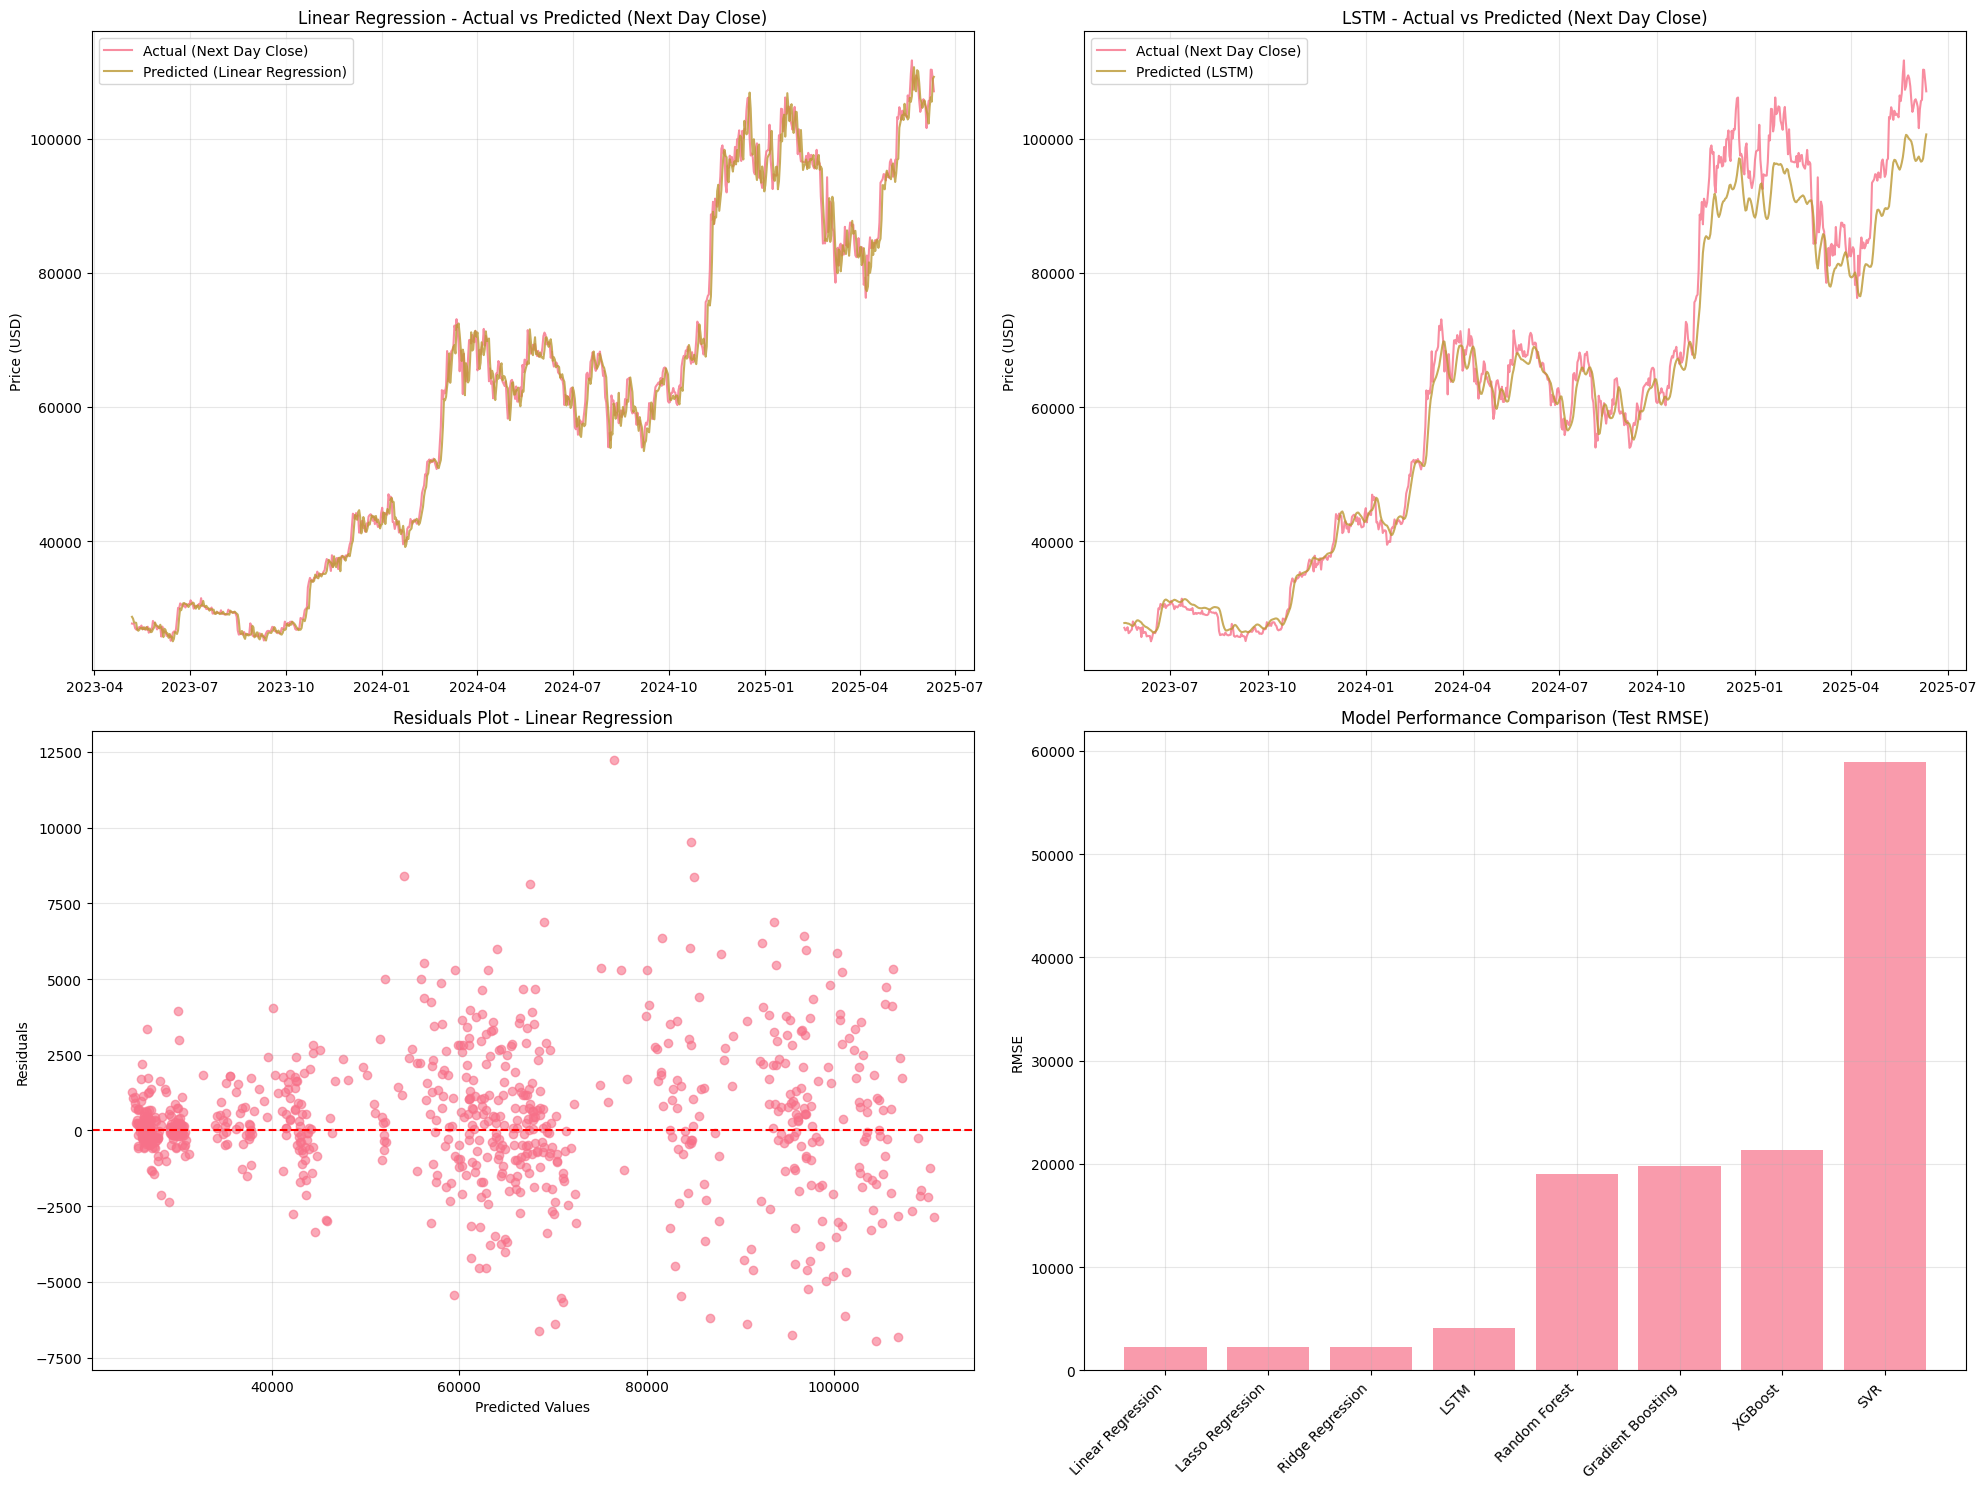

In [23]:
# Visualization of predictions
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# --- 1. Best traditional ML model predictions ---
if 'results_df' in locals() and not results_df.empty and 'model_predictions' in locals():
    best_traditional_model_name = results_df.iloc[0]['Model']
    if best_traditional_model_name in model_predictions:
        best_traditional_predictions = model_predictions[best_traditional_model_name]

        if 'y_test' in locals() and hasattr(y_test, 'index'):
            # y_test adalah target sebenarnya (harga Close hari berikutnya)
            # y_test.index adalah tanggal yang sesuai untuk prediksi ini
            axes[0,0].plot(y_test.index, y_test.values, label='Actual (Next Day Close)', alpha=0.8)
            axes[0,0].plot(y_test.index, best_traditional_predictions, label=f'Predicted ({best_traditional_model_name})', alpha=0.8)
            axes[0,0].set_title(f'{best_traditional_model_name} - Actual vs Predicted (Next Day Close)')
        else:
            axes[0,0].set_title(f'{best_traditional_model_name} - Data y_test tidak ditemukan')
    else:
        axes[0,0].set_title('Model tradisional terbaik tidak ditemukan di model_predictions')
else:
    axes[0,0].set_title('Data hasil model tradisional (results_df) tidak ditemukan')

axes[0,0].set_ylabel('Price (USD)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)


# --- 2. LSTM predictions ---
if 'y_lstm_test_actual' in locals() and 'lstm_test_pred' in locals():
    len_lstm_predictions = len(y_lstm_test_actual.flatten())
    lstm_plot_dates = None

    if 'y_test' in locals() and hasattr(y_test, 'index') and len(y_test.index) >= len_lstm_predictions:
        lstm_plot_dates = y_test.index[-len_lstm_predictions:]
    elif 'df_features' in locals() and hasattr(df_features, 'index') and len(df_features.index) >= len_lstm_predictions:
        print("Peringatan: Menggunakan df_features.index untuk lstm_plot_dates, periksa keselarasan.")
        lstm_plot_dates = df_features.index[-(len_lstm_predictions):]
    else:
        print("Peringatan: Tidak ada DatetimeIndex yang sesuai untuk plot LSTM. Menggunakan range.")
        lstm_plot_dates = range(len_lstm_predictions)

    axes[0,1].plot(lstm_plot_dates, y_lstm_test_actual.flatten(), label='Actual (Next Day Close)', alpha=0.8)
    axes[0,1].plot(lstm_plot_dates, lstm_test_pred.flatten(), label='Predicted (LSTM)', alpha=0.8)
    axes[0,1].set_title('LSTM - Actual vs Predicted (Next Day Close)')
else:
    axes[0,1].set_title('Data prediksi LSTM tidak ditemukan')

axes[0,1].set_ylabel('Price (USD)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)


# --- 3. Residuals analysis (untuk model tradisional terbaik) ---
if 'y_test' in locals() and 'best_traditional_predictions' in locals() and best_traditional_predictions is not None:
    residuals = y_test.values - best_traditional_predictions
    axes[1,0].scatter(best_traditional_predictions, residuals, alpha=0.6)
    axes[1,0].axhline(y=0, color='red', linestyle='--')
    axes[1,0].set_title(f'Residuals Plot - {best_traditional_model_name if "best_traditional_model_name" in locals() else "Model Terbaik"}')
else:
    axes[1,0].set_title('Data untuk plot residual tidak ditemukan')

axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')
axes[1,0].grid(True, alpha=0.3)


# --- 4. Model performance comparison ---
if 'final_results' in locals() and not final_results.empty:
    model_names = final_results['Model'].values
    rmse_values = final_results['Test_RMSE'].values

    # Filter out potential non-numeric RMSE values if any (e.g., from failed model runs)
    valid_indices = [i for i, x in enumerate(rmse_values) if isinstance(x, (int, float))]
    model_names_filtered = model_names[valid_indices]
    rmse_values_filtered = rmse_values[valid_indices]

    if len(model_names_filtered) > 0 :
        axes[1,1].bar(model_names_filtered, rmse_values_filtered, alpha=0.7)
        axes[1,1].set_title('Model Performance Comparison (Test RMSE)')
        axes[1,1].set_ylabel('RMSE')
        # Mengatur rotasi dan alignment label x
        axes[1,1].set_xticklabels(model_names_filtered, rotation=45, ha="right")
    else:
        axes[1,1].set_title('Tidak ada data RMSE valid untuk ditampilkan')
else:
    axes[1,1].set_title('Data hasil akhir (final_results) tidak ditemukan')

axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## ===== 11. FEATURE IMPORTANCE ANALYSIS =====

In [24]:
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

# Pastikan 'results_df' sudah ada dari sel evaluasi model tradisional
if 'results_df' in locals() and not results_df.empty:
    # Ambil nama model tradisional terbaik
    best_traditional_model_name = results_df.iloc[0]['Model'] # Menggunakan nama yang konsisten
    print(f"Best traditional model selected for feature importance: {best_traditional_model_name}")

    # Get feature importance from best tree-based model
    # Cek apakah model terbaik adalah salah satu dari model tree
    if best_traditional_model_name in ['Random Forest', 'XGBoost', 'Gradient Boosting']:

        best_model_object = None # Untuk menyimpan objek model yang sudah dilatih

        # Ambil objek model yang sudah dilatih dari dictionary 'trained_models'
        # (diasumsikan 'trained_models' sudah ada dari sel penyimpanan model atau evaluasi)
        if 'trained_models' in locals() and best_traditional_model_name in trained_models:
            best_model_object = trained_models[best_traditional_model_name]
        else:
            # Jika 'trained_models' tidak ada, atau model tidak ada di sana, latih ulang
            print(f"Melatih ulang model {best_traditional_model_name} untuk feature importance...")
            for name, model_instance in models.items(): # models adalah dict awal instance model
                if name == best_traditional_model_name:
                    # Model tree tidak memerlukan data yang diskalakan
                    model_instance.fit(X_train, y_train) # Gunakan X_train asli
                    best_model_object = model_instance
                    break

        if best_model_object is not None and hasattr(best_model_object, 'feature_importances_'):
            # Pastikan 'feature_columns_for_model' sudah ada dari sel persiapan data
            if 'feature_columns_for_model' in locals():
                feature_importance = pd.DataFrame({
                    'feature': feature_columns_for_model, # Gunakan daftar kolom fitur yang benar
                    'importance': best_model_object.feature_importances_
                }).sort_values('importance', ascending=False)

                plt.figure(figsize=(12, 8))
                top_features = feature_importance.head(15)
                sns.barplot(data=top_features, x='importance', y='feature')
                plt.title(f'Top 15 Feature Importance - {best_traditional_model_name}')
                plt.xlabel('Importance')
                plt.tight_layout()
                plt.show()

                print("Top 10 Most Important Features:")
                print(feature_importance.head(10))

                # Simpan feature importance (jika diinginkan di sini, atau di sel penyimpanan)
                # try:
                #     feature_importance.to_csv('feature_importance.csv', index=False)
                #     print("✅ Saved feature importance")
                # except Exception as e:
                #     print(f"⚠️ Could not save feature importance: {e}")

            else:
                print("⚠️ Variabel 'feature_columns_for_model' tidak terdefinisi. Tidak dapat membuat feature importance.")
        else:
            print(f"Model {best_traditional_model_name} tidak mendukung 'feature_importances_' atau objek model tidak ditemukan.")
    else:
        print(f"Model terbaik ({best_traditional_model_name}) bukan model berbasis tree yang mendukung feature_importances_ secara langsung.")
        print("Untuk model linear, Anda bisa melihat koefisiennya (model.coef_).")
        # Anda bisa menambahkan kode di sini untuk menampilkan koefisien model linear jika itu yang terbaik

else:
    print("⚠️ DataFrame 'results_df' tidak ditemukan atau kosong. Jalankan sel evaluasi model terlebih dahulu.")


=== FEATURE IMPORTANCE ANALYSIS ===
Best traditional model selected for feature importance: Linear Regression
Model terbaik (Linear Regression) bukan model berbasis tree yang mendukung feature_importances_ secara langsung.
Untuk model linear, Anda bisa melihat koefisiennya (model.coef_).


## ===== 12. SAVE MODELS AND RESULTS =====

In [25]:
print("\n=== SAVING MODELS AND RESULTS ===")

import joblib

# Pastikan variabel 'best_traditional_model_name' sudah ada dari sel sebelumnya
if 'best_traditional_model_name' in locals():

    # 1. Latih ulang model TERBAIK untuk memastikannya siap disimpan
    best_trained_model_obj = None
    for name, model in models.items():
        if name == best_traditional_model_name:
            print(f"Re-training {name} to save as the best model...")
            if name in ['SVR', 'Linear Regression', 'Ridge Regression', 'Lasso Regression']:
                model.fit(X_train_scaled, y_train)
            else:
                model.fit(X_train, y_train)
            best_trained_model_obj = model
            break

    # 2. Simpan model tradisional TERBAIK dan SCALER-nya
    if best_trained_model_obj:
        joblib.dump(best_trained_model_obj, 'best_bitcoin_model.pkl')
        joblib.dump(scaler, 'feature_scaler.pkl') # scaler untuk fitur model tradisional
        print(f"✅ Saved {best_traditional_model_name} model and feature_scaler.")
    else:
        print(f"❌ Error: Could not save {best_traditional_model_name} model.")

    # 3. Simpan model LSTM dan SCALER-nya
    try:
        lstm_model.save('lstm_bitcoin_model.keras')
        joblib.dump(lstm_scaler, 'lstm_scaler.pkl') # scaler khusus untuk LSTM
        print("✅ Saved LSTM model and lstm_scaler.")
    except Exception as e:
        print(f"⚠️ Could not save LSTM model: {e}")

    # 4. Simpan daftar kolom fitur yang digunakan (untuk prediksi di masa depan)
    try:
        # Kita gunakan 'feature_columns_for_model' dari sel persiapan data
        joblib.dump(feature_columns_for_model, 'feature_columns.pkl')
        print("✅ Saved feature column names.")
    except NameError:
        print("⚠️ Variabel 'feature_columns_for_model' tidak ditemukan. Gagal menyimpan nama kolom.")
    except Exception as e:
        print(f"⚠️ Could not save feature columns: {e}")

    # 5. Simpan DataFrame hasil performa
    try:
        final_results.to_csv('model_performance_results.csv', index=False)
        print("✅ Saved performance results.")
    except Exception as e:
        print(f"⚠️ Could not save performance results: {e}")

else:
    print("⚠️ Variabel 'best_traditional_model_name' tidak ditemukan. Jalankan sel sebelumnya.")


=== SAVING MODELS AND RESULTS ===
Re-training Linear Regression to save as the best model...
✅ Saved Linear Regression model and feature_scaler.
✅ Saved LSTM model and lstm_scaler.
✅ Saved feature column names.
✅ Saved performance results.


## ===== 13. PREDICTION FUNCTION =====

In [26]:
def make_prediction(model, scaler, latest_data, model_type='traditional'):
    """Make price prediction using trained model"""

    if model_type == 'traditional':
        # Prepare features
        latest_features = latest_data[feature_cols].iloc[-1:].values
        latest_scaled = scaler.transform(latest_features)
        prediction = model.predict(latest_scaled)[0]

    elif model_type == 'lstm':
        # Prepare LSTM input (last 60 days)
        latest_prices = latest_data['Close'].iloc[-lookback:].values.reshape(-1, 1)
        latest_scaled = scaler.transform(latest_prices)
        lstm_input = latest_scaled.reshape(1, lookback, 1)
        prediction_scaled = model.predict(lstm_input)
        prediction = scaler.inverse_transform(prediction_scaled)[0][0]

    return prediction

In [27]:
# Example prediction
print("\n=== MAKING A TEST PREDICTION ===")

# Pastikan variabel yang dibutuhkan sudah ada
if 'trained_models' in locals() and 'best_traditional_model_name' in locals():

    # Ambil model terbaik yang sudah dilatih dari dictionary
    best_trained_model = trained_models[best_traditional_model_name]

    # Dapatkan data terbaru untuk membuat prediksi
    # Gunakan df_features karena memiliki semua kolom yang mungkin dibutuhkan
    latest_data_for_pred = df_features.iloc[-1:].copy()

    # Prediksi menggunakan model tradisional terbaik
    prediction_input = latest_data_for_pred[feature_columns_for_model]

    if best_traditional_model_name in ['SVR', 'Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        prediction_input_scaled = scaler.transform(prediction_input)
        traditional_pred = best_trained_model.predict(prediction_input_scaled)[0]
    else:
        traditional_pred = best_trained_model.predict(prediction_input)[0]

    print(f"Prediksi harga besok ({best_traditional_model_name}): ${traditional_pred:,.2f}")

    # Prediksi menggunakan model LSTM
    # Pastikan fungsi make_prediction dan model LSTM (lstm_model) sudah ada
    try:
        lstm_pred = make_prediction(lstm_model, lstm_scaler, df_features, 'lstm')
        print(f"Prediksi harga besok (LSTM): ${lstm_pred:,.2f}")
    except NameError:
        print("Peringatan: Model LSTM atau fungsi prediksi belum dibuat. Langkah LSTM harus dijalankan terlebih dahulu.")
    except Exception as e:
        print(f"Error saat prediksi LSTM: {e}")

    print("-" * 30)
    print(f"Harga penutupan terakhir (hari ini): ${df_features['Close'].iloc[-1]:,.2f}")

else:
    print("⚠️ Variabel 'trained_models' atau 'best_traditional_model_name' tidak ditemukan. Jalankan sel sebelumnya.")



=== MAKING A TEST PREDICTION ===
⚠️ Variabel 'trained_models' atau 'best_traditional_model_name' tidak ditemukan. Jalankan sel sebelumnya.


In [28]:
# Create a proper prediction function for future use
def predict_next_price(model_name='auto'):
    """
    Predict next day Bitcoin price

    Parameters:
    model_name: str - 'auto' (best model), specific model name, or 'ensemble'

    Returns:
    dict with prediction details
    """

    current_price = df_features['Close'].iloc[-1]
    predictions = {}

    # Traditional ML predictions
    for name, model in trained_models.items():
        try:
            if name in ['SVR', 'Linear Regression', 'Ridge Regression', 'Lasso Regression']:
                latest_features = df_features[feature_cols].iloc[-1:].values
                latest_scaled = scaler.transform(latest_features)
                pred = model.predict(latest_scaled)[0]
            else:
                latest_features = df_features[feature_cols].iloc[-1:].values
                pred = model.predict(latest_features)[0]

            predictions[name] = pred
        except:
            # Fallback
            recent_trend = df_features['Close'].pct_change().tail(5).mean()
            predictions[name] = current_price * (1 + recent_trend)

    # LSTM prediction
    try:
        predictions['LSTM'] = make_prediction(lstm_model, lstm_scaler, df_features, 'lstm')
    except:
        recent_trend = df_features['Close'].pct_change().tail(10).mean()
        predictions['LSTM'] = current_price * (1 + recent_trend * 0.8)

    # Ensemble prediction (average of top 3 models)
    sorted_models = sorted(predictions.items(), key=lambda x: abs(x[1] - current_price))
    top_3_preds = [pred for _, pred in sorted_models[:3]]
    ensemble_pred = np.mean(top_3_preds)
    predictions['Ensemble'] = ensemble_pred

    # Determine best prediction
    if model_name == 'auto':
        best_pred = predictions[best_traditional]
    elif model_name == 'ensemble':
        best_pred = ensemble_pred
    elif model_name in predictions:
        best_pred = predictions[model_name]
    else:
        best_pred = predictions[best_traditional]

    # Calculate prediction confidence based on model agreement
    pred_values = list(predictions.values())
    pred_std = np.std(pred_values)
    confidence = max(0, 100 - (pred_std / current_price * 100 * 5))

    result = {
        'current_price': current_price,
        'predicted_price': best_pred,
        'price_change': best_pred - current_price,
        'price_change_pct': ((best_pred - current_price) / current_price) * 100,
        'confidence': confidence,
        'all_predictions': predictions,
        'model_used': model_name if model_name != 'auto' else best_traditional
    }

    return result

In [29]:
# Create a proper prediction function for future use
def predict_next_price(model_name='auto'):
    """
    Predict next day Bitcoin price

    Parameters:
    model_name: str - 'auto' (best model), specific model name, or 'ensemble'

    Returns:
    dict with prediction details
    """
    # Pastikan variabel global yang diperlukan sudah ada
    if 'df_features' not in globals() or 'trained_models' not in globals() or 'best_traditional_model_name' not in globals():
        return {"error": "Variabel penting tidak ditemukan. Jalankan sel-sel sebelumnya."}

    current_price = df_features['Close'].iloc[-1]
    predictions = {}

    # Traditional ML predictions
    for name, model in trained_models.items():
        try:
            if name in ['SVR', 'Linear Regression', 'Ridge Regression', 'Lasso Regression']:
                prediction_input = df_features[feature_columns_for_model].iloc[-1:]
                prediction_input_scaled = scaler.transform(prediction_input)
                pred = model.predict(prediction_input_scaled)[0]
            else:
                prediction_input = df_features[feature_columns_for_model].iloc[-1:]
                pred = model.predict(prediction_input)[0]
            predictions[name] = pred
        except Exception:
            predictions[name] = current_price # Fallback jika ada error

    # LSTM prediction
    try:
        predictions['LSTM'] = make_prediction(lstm_model, lstm_scaler, df_features, 'lstm')
    except Exception:
        predictions['LSTM'] = current_price # Fallback

    # Ensemble prediction
    sorted_models = sorted(predictions.items(), key=lambda x: abs(x[1] - current_price))
    top_3_preds = [pred for _, pred in sorted_models[:3]]
    ensemble_pred = np.mean(top_3_preds)
    predictions['Ensemble'] = ensemble_pred

    # === PERBAIKAN DI BAGIAN INI ===
    # Determine best prediction
    model_to_report = ""
    if model_name == 'auto':
        best_pred = predictions[best_traditional_model_name]
        model_to_report = best_traditional_model_name
    elif model_name == 'ensemble':
        best_pred = ensemble_pred
        model_to_report = 'Ensemble'
    elif model_name in predictions:
        best_pred = predictions[model_name]
        model_to_report = model_name
    else: # Fallback
        best_pred = predictions[best_traditional_model_name]
        model_to_report = best_traditional_model_name

    # Calculate prediction confidence
    pred_values = list(predictions.values())
    pred_std = np.std(pred_values)
    confidence = max(0, 100 - (pred_std / current_price * 100 * 5))

    result = {
        'current_price': current_price,
        'predicted_price': best_pred,
        'price_change': best_pred - current_price,
        'price_change_pct': ((best_pred - current_price) / current_price) * 100,
        'confidence': confidence,
        'all_predictions': predictions,
        'model_used': model_to_report
    }

    return result
